# An Exploration of the Mandelbrot-Set, Julia-Set and the chaotic Bifurcation

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

## Naive Implementation

In [24]:
def create_mandelbrot(c):
    f = lambda x: x**2 + c
    return f

def stability(number, it):
    return number / it

def run(f, it):
    x = 0
    
    number = 0
    for i in range(it):
        number = i
        x = f(x)
        if abs(x) > 2:
            break
    
    return stability(number, it)


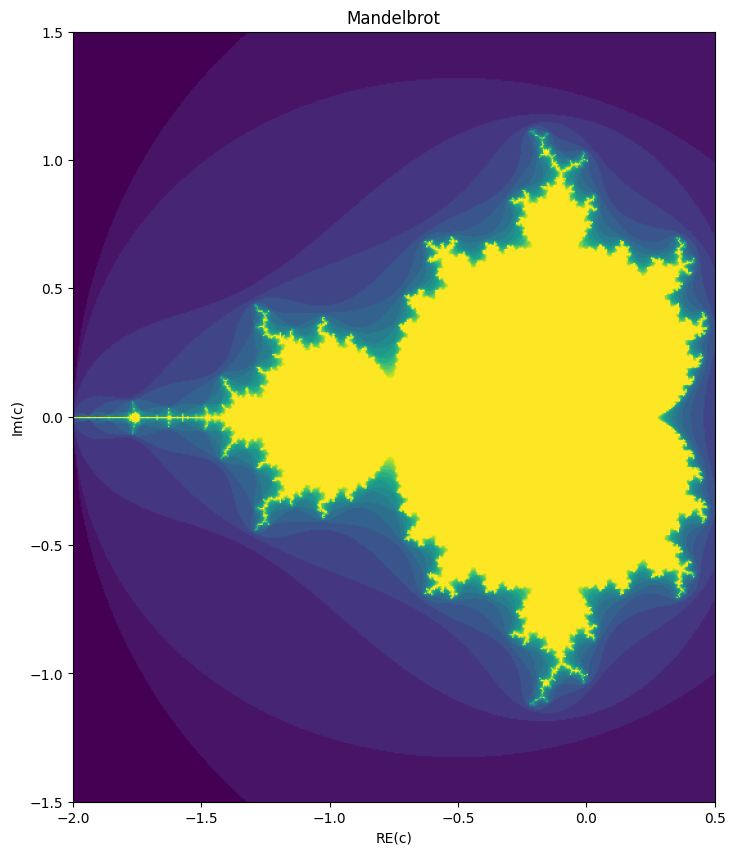

In [25]:
def plot_mandelbrot(r_upper=.5, r_lower=-2, i_upper=1.5, i_lower=-1.5, it=20):
    x = np.arange(r_lower, r_upper, 0.005)
    y = np.arange(i_lower, i_upper, 0.005)

    xv, yv = np.meshgrid(x, y)

    complex = xv + yv * 1j

    res = np.zeros(complex.shape)

    for idx, c in np.ndenumerate(complex):
        res[idx] = run(create_mandelbrot(c), it)

    plt.figure(figsize=(15,10))
    plt.imshow(res, extent=[r_lower, r_upper, i_lower, i_upper])
    plt.title("Mandelbrot")
    plt.xlabel("RE(c)")
    plt.ylabel("Im(c)")
    

plot_mandelbrot()



## Matrix-wise Implementation

In [26]:
R_UPPER = .5
R_LOWER = -2
I_UPPER = 1.3
I_LOWER = -1.3

In [27]:
def mandelbrot(x, c):
    return x**2 + c

def create_grid(stepsize, r_upper=R_UPPER, r_lower=R_LOWER, i_upper=I_UPPER, i_lower=I_LOWER):
    x = np.arange(r_lower, r_upper, stepsize)
    y = np.arange(i_lower, i_upper, stepsize)

    xv, yv = np.meshgrid(x, y)

    return xv + yv * 1j

In [28]:
# it: max number of iterations to run
# sample_step: the sample step size of the grid
def plot_mandelbrot(it, sample_step, cmap="viridis"):
    # to handle overflow of very large numbers
    err_setting = np.seterr(over='ignore', invalid='ignore')
    grid = create_grid(sample_step)

    x = 0
    res = []
    for i in range(it):
        x = mandelbrot(x, grid)

        res.append((np.abs(x) <= 2).astype(int))

    stabil = np.stack(res, axis=0).sum(axis=0)

    plt.figure(figsize=(15,10))
    plt.imshow(stabil, extent=[R_LOWER, R_UPPER, I_LOWER, I_UPPER], cmap=cmap)
    plt.title("Mandelbrot")
    plt.xlabel("RE(c)")
    plt.ylabel("Im(c)")
    

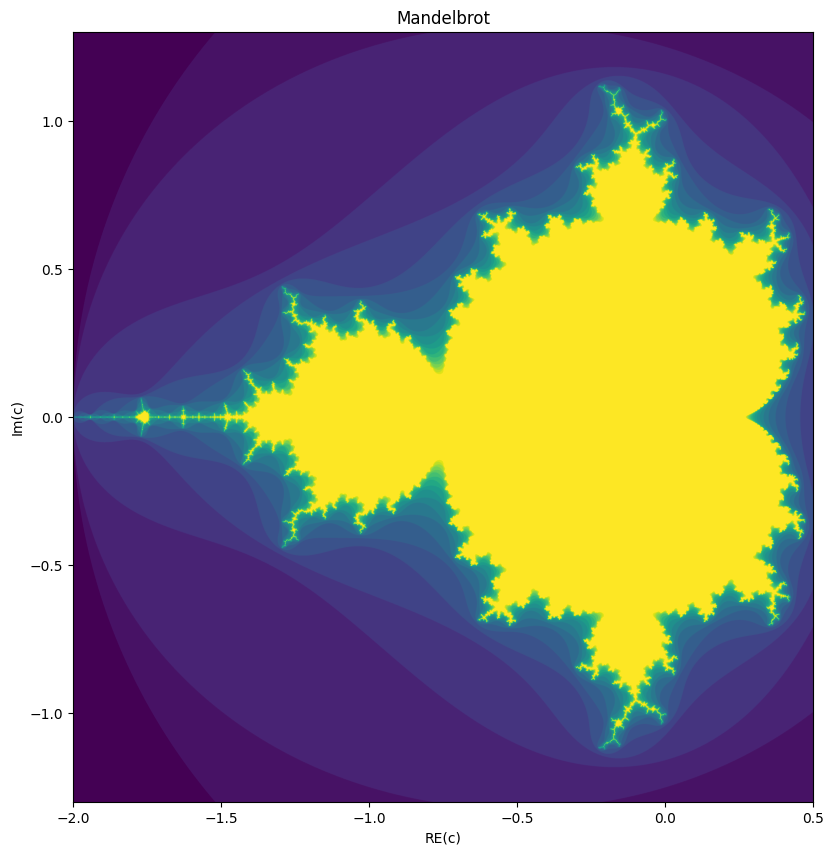

In [29]:
plot_mandelbrot(20, 0.0005)

You can alter the colormap! An Overview of availible maps can you find [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [30]:
list(colormaps)[5]

'twilight'

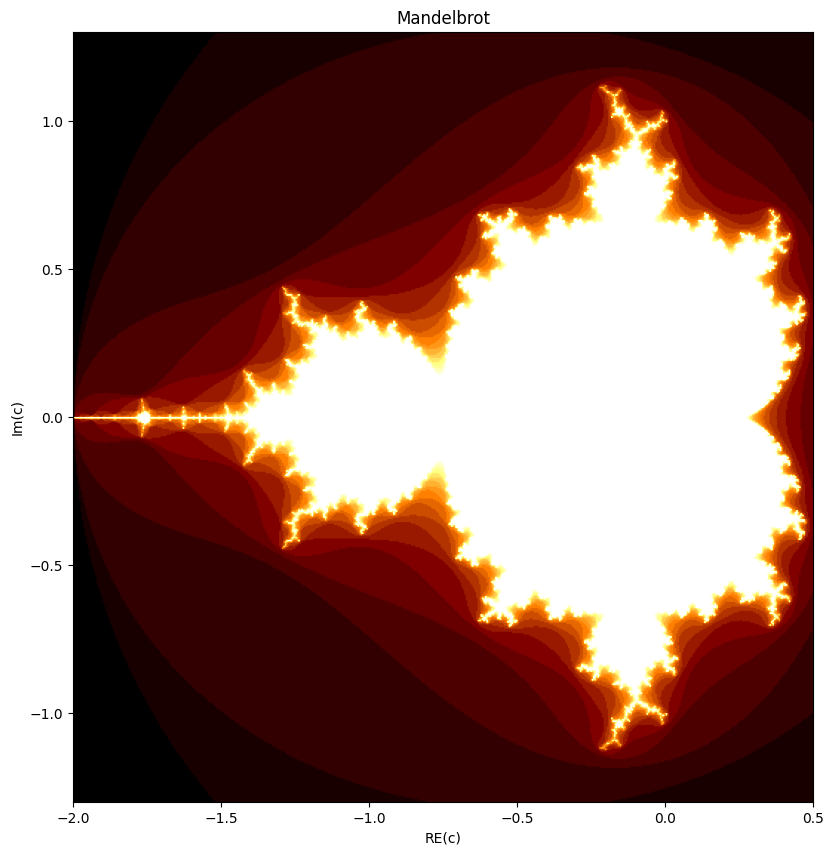

In [31]:
plot_mandelbrot(20, 0.005, "afmhot")

## Julia Set

In [32]:
R_UPPER = 1.5
R_LOWER = -1.5
I_UPPER = 1.5
I_LOWER = -1.5

In [33]:
# it: max number of iterations to run
# sample_step: the sample step size of the grid
def plot_juliaset(it, sample_step, c, cmap="viridis"):
    # to handle overflow of very large numbers
    err_setting = np.seterr(over='ignore', invalid='ignore')
    grid = create_grid(sample_step, r_upper=R_UPPER, r_lower=R_LOWER, i_upper=I_UPPER, i_lower=I_LOWER)
    
    res = []
    for i in range(it):
        grid = mandelbrot(grid, c)

        res.append((np.abs(grid) <= 2).astype(int))

    stabil = np.stack(res, axis=0).sum(axis=0)

    plt.figure(figsize=(15,10))
    plt.imshow(stabil, extent=[R_LOWER, R_UPPER, I_LOWER, I_UPPER], cmap=cmap)
    plt.title("Julia Set for c = " + str(c))
    plt.xlabel("RE(x) (start value)")
    plt.ylabel("Im(x) (start value)")


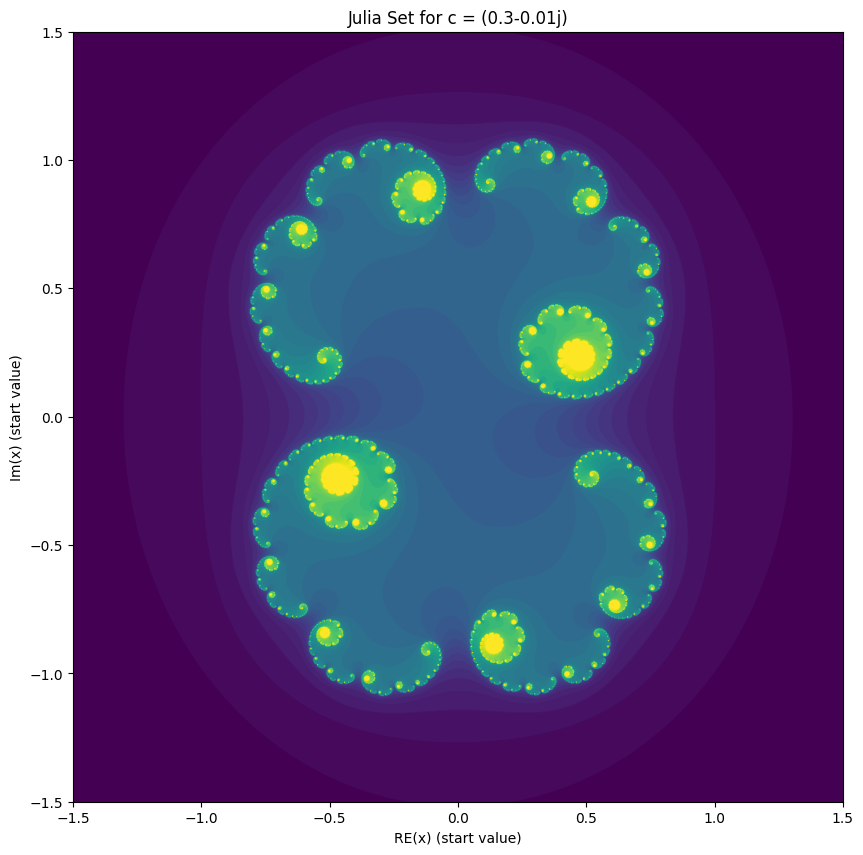

In [34]:
plot_juliaset(40, 0.001, .3-.01j)

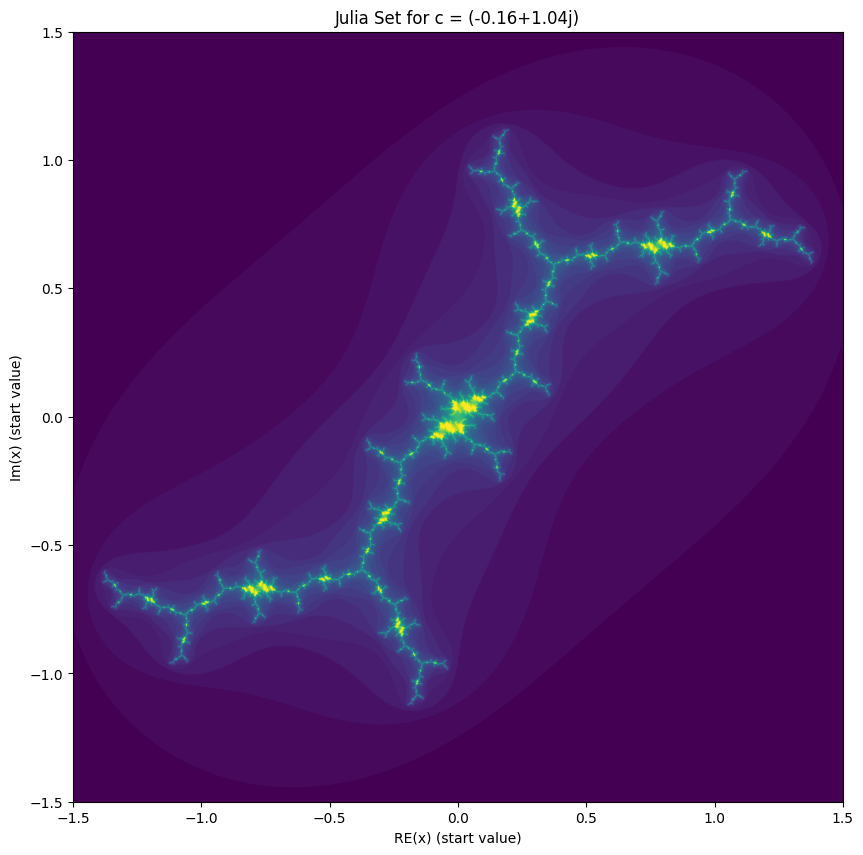

In [35]:
plot_juliaset(40, 0.001, -.16+1.04j)

## Bifurcation

In [40]:
# population growth
# p: population percentage
# 1-p: population percentage of prayer
# r: population growth
def logistic_map(r, p):
    return r*p*(1-p)

Text(0.5, 1.0, 'Relation of population')

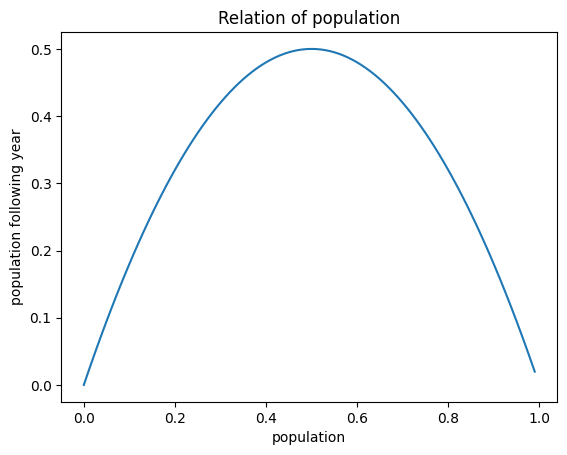

In [50]:
p = np.arange(0, 1, 0.01)
pn = logistic_map(2, p)

plt.plot(p, pn)
plt.xlabel("population")
plt.ylabel("population following year")
plt.title("Relation of population")

In [103]:
def run_logitsic_map(r, p, years):
    ps = [p]
    for _ in range(years):
        p = logistic_map(r, p)
        ps.append(p)

    return np.stack(ps, axis=0)

def plot_growth_over_t(r, years):
    p = np.arange(0,1, 0.001)[1:]

    ps = run_logitsic_map(r, p, years)

    equilibrium = ps[-1,:].mean()

    for p in ps.T:
        plt.plot(p, color="r", alpha=.1)

    plt.hlines(equilibrium, 0, 10, label=f"Equilibrium: {round(equilibrium, 4)}")

    plt.title(f"Population growth for {years} years")
    plt.xlabel("Year")
    plt.ylabel("population")
    plt.legend()

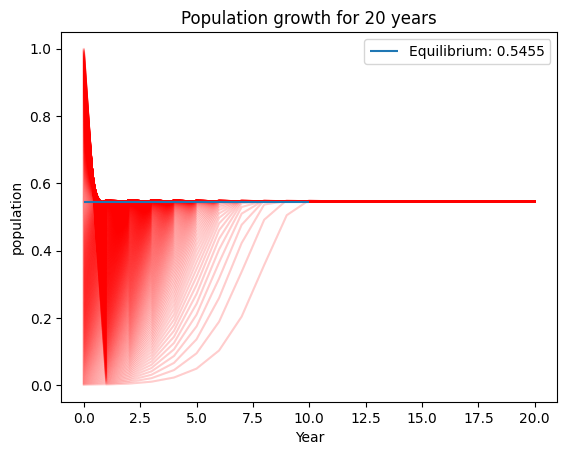

In [104]:
plot_growth_over_t(2.2, 20)

In [115]:
def determine_equilibrium(ps: np.ndarray):
    # check for one equilibrium
    if np.isclose(ps.max()-ps.min(), [0]):
        #print("one equilibrium")
        return [ps.mean()]
    
    # check for two equilibriums
    if np.allclose(ps[2:], ps[:-2]):
        #print("two equilibrium")
        return ps[-2:]
    
    # check for three equilibriums
    if np.allclose(ps[3:], ps[:-3]):
        #print("three equilibrium")
        return ps[-3:]
    
    # check for three equilibriums
    if np.allclose(ps[4:], ps[:-4]):
        #print("four equilibrium")
        return ps[-4:]
    
    return []
    
determine_equilibrium(np.array([0.5,1,1.5,0.5,1,1.5,0.5]))

array([1. , 1.5, 0.5])

[0.5        0.25       0.1875     0.15234375 0.12913513 0.11245925
 0.09981217 0.0898497  0.08177673 0.0750893  0.06945089 0.06462747
 0.06045076 0.05679646 0.05357063 0.05070081 0.04813024 0.04581372
 0.04371482 0.04180384 0.04005628 0.03845177 0.03697323 0.03560621
 0.03433841 0.03315928 0.03205975 0.03103192 0.03006894 0.0291648
 0.02831421 0.02751252 0.02675558 0.02603972 0.02536165 0.02471844
 0.02410744 0.02352627 0.02297278 0.02244503 0.02194125 0.02145984
 0.02099931 0.02055834 0.02013569 0.01973025 0.01934097 0.01896689
 0.01860715 0.01826092 0.01792746]
[]


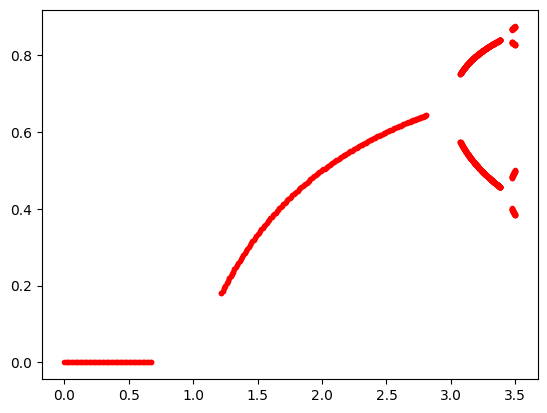

In [122]:
p_init = .5
years = 50

# alter the point density for the interesting regions
rs = np.concatenate([np.arange(0, 3, 0.01), np.arange(3, 3.5, 0.001)])

for r in rs:
    ps = run_logitsic_map(r, p_init, years)

    equ = determine_equilibrium(ps[-10:])

    if r == 1:
        print(ps)
        print(equ)

    if len(equ) != 0:
        plt.scatter(np.repeat(r, len(equ)), equ, color="r", marker=".")